<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Алексей, привет!👋</b>  

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Ты можешь реагировать на комментарии как просто написав их в Markdown-ячейках, так и выделив их цветом. Например, <font color='blue'>синим</font>. Второй способ, на мой взгляд, удобнее.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
 
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку! 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [4]:
# Подключаем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Разбиение на обучающую, валидационную и тестовую выборку
from sklearn.model_selection import train_test_split

# Масштабируемость модели
from sklearn.preprocessing import StandardScaler

# и для машинного обучения разными способами:
# - Случайный лес
from sklearn.ensemble import RandomForestClassifier
# - Решающее дерево
from sklearn.tree import DecisionTreeClassifier
# - Модель на адекватность
from sklearn.dummy import DummyClassifier

from sklearn.metrics import (
    # Точность модели
    accuracy_score,
    # Матрицы ошибок (для борьбы с дисбалансом)
    confusion_matrix, 
    # Полнота
    recall_score, 
    # Точность
    precision_score, 
    # F1-мера
    f1_score,
    # Метрика AUC-ROC
    roc_auc_score,
    roc_curve
)

# Контроль выборки
from sklearn.utils import shuffle

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Если загружаем несколько функций из одного пакета, то удобнее записать это через запятую.
    
`from sklearn.metrics import f1_score, roc_auc_score`
    
А если через запятую будет больше трех позиций, в таком случае здесь было бы идеально привести оформление в соответствие с <a href="https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html">pep8</a> - не оставлять длинных строк. 

Такое оформление предпочтительнее:    
    
`from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    f1_score, 
    mean_squared_error, 
    roc_auc_score
)`
    
        
</div>



<div class="alert alert-block alert-info">

V1: Подправил
    
</div>

In [5]:
# Получаем датасет
try:
    df = pd.read_csv('/datasets/Churn.csv')

    # Узнаем, что в нем
    df.info()
except:
    print('Отсутствует датасет. Проверьте путь файла')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [7]:
# Проверим на наличие пропущенных значений
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Себе на пометку:
Если в каком то признаке пустые значения, то его следует заполнять, иначе выводит ошибку такого рода: "Input contains NaN, infinity or a value too large for dtype('float32')"


In [8]:
# Заполняем пропуски медианным значением
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично
</div>

In [9]:
# Снова проверим на пропущенные значения
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Исследование задачи

In [10]:
# Убираем лишние: фамилии, айдишники, порядковые номера
df = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [11]:
# Уклоняемся от дамми-ловушек
df_ohe = pd.get_dummies(df, drop_first=True)

In [12]:
#код ревюьера
df_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь необходимо перед энкодингом удалить все лишние колонки: фамилии, айдишники, порядковые номера - все, что модель будет видеть только по одному разу. Обучиться на этом она не сможет.
    
Фамилии попали в энкодинг, теперь у нас около 3000 колонок, 99% из которых бесполезны (слабо вредны) для моделей.

</div>


<div class="alert alert-block alert-info">

V1: Подправил
    
</div>

In [13]:
# Получаем признак и цель 
features = df_ohe.drop('Exited', axis=1)
target = df_ohe['Exited']

In [14]:
# Как обычно, будем разделять 60% данных для обучающей выборки, а features_temp и target_temp будут временным датафреймом
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size= (1 - 0.6), random_state=12345) 

In [15]:
# А тестовая и валидационная - по 20% данных
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=(1 - 0.5), random_state=12345)

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

С разбиением на выборки согласен. Размер выборок можно указывать без математических операций. Во втором случае особенно странно выглядит, почему бы не написать 0.5?
       
</div>

<div class="alert alert-block alert-info">

V1: Постарался написать код более читабельным
    
</div>

In [16]:
# Вызов библиотеки для отключения предупреждения
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Масштабируем признаки: обучающую, валидационную и тестовую выборку
scaler = StandardScaler()

# Выберем подходящие признаки по порядку (количественные, а не категориальные)
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

scaler.fit(features_train[numeric])

# Преобразуем обучающую, валидационную и тестовую выборки функцией transform()
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# Чтобы предупреждение не появлялось
pd.options.mode.chained_assignment = None

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично. я бы убрал предупреждения. `warnings.filterwarnings('ignore')` после `import warnings`.
</div>

<div class="alert alert-block alert-info">

V1: Добавлена еще библиотека
    
</div>

In [18]:
# Проверим
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


In [19]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,8.0,1.232271,1,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,8.0,0.600563,1,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,3.0,1.027098,2,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,6.0,-1.233163,2,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,2.0,1.140475,1,0,0,1.524268,1,0,0


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь видно, что RowNumber	CustomerId нужно удалить. Для линейных моделей при остальных отмасштабированных признаках такие огромные значения CustomerId будут катастрофой и невозможностью схождения функции.
       
</div>


<div class="alert alert-block alert-info">

V1: Здесь уже надо получается делать так:
    
    features_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
    
</div>

In [20]:
example_1 = features_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

In [21]:
example_1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7479,-0.886751,-0.373192,8.0,1.232271,1,1,0,-0.187705
3411,0.608663,-0.183385,8.0,0.600563,1,0,0,-0.333945
6027,2.052152,0.480939,3.0,1.027098,2,0,1,1.503095
1247,-1.457915,-1.417129,6.0,-1.233163,2,1,0,-1.071061
3716,0.130961,-1.132419,2.0,1.140475,1,0,0,1.524268


Все в порядке, переходим дальше

In [22]:
# Примененим методом решающего дерева, меняя гиперпараметры
best_model = None
best_result = 0

for depth in range(1, 10):
    # Обучим модель с заданной глубиной дерева
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    
    # Обучим модель
    model.fit(features_train, target_train)
    
    # Получим предсказания модели
    predicted_valid = model.predict(features_valid)
    
    # Посчитаем качество модели
    result = accuracy_score(target_valid, predicted_valid) 
    
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
    
    print("max_depth =", depth, ": ", end='')
    print(result)
    
print()
print("Accuracy наилучшей модели на валидационной выборке:", best_result)

max_depth = 1 : 0.791
max_depth = 2 : 0.824
max_depth = 3 : 0.838
max_depth = 4 : 0.852
max_depth = 5 : 0.853
max_depth = 6 : 0.858
max_depth = 7 : 0.8505
max_depth = 8 : 0.85
max_depth = 9 : 0.845

Accuracy наилучшей модели на валидационной выборке: 0.858


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
В дереве и лесе важно подобрать гиперпараметры. В дереве - глубину, в лесе - минимум глубину и количество оценщиков (эстиматоров, деревьев).

</div>




<div class="alert alert-block alert-info">

V1: Подправлен: добавлен гиперпараметры
    
</div>

In [23]:
# Узнаем матрицу ошибок, чтобы выявлять полноту, точность и F1
confusion_matrix(target_valid,predicted_valid)

array([[1490,   92],
       [ 218,  200]], dtype=int64)

In [24]:
# Выявляем полноту, т.е. долю TP-ответов среди всех, у которых истинная метка 1. 
# Хорошо, когда значение recall близко к единице: модель хорошо ищет положительные объекты. 
# Если ближе к нулю — модель надо перепроверить и починить.

recall_score(target_valid, predicted_valid)

0.4784688995215311

Полнота близка к 1, значит модель неплоха

In [25]:
# Выявляем точность, т.е. как много отрицательных ответов нашла модель, пока искала положительные. 
# Чем больше отрицательных, тем ниже точность.
precision_score(target_valid, predicted_valid)

0.684931506849315

Точность близка к 0, но положительное значение, значит присутствуют незначителльное кол-во отрицательных ответов

In [26]:
# Выявляем F1-меру, т.е. соотношение полноты и точности
f1_score(target_valid, predicted_valid)

0.5633802816901409

Получилось меньше заявленного требования, примерно на  на 12%

In [28]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

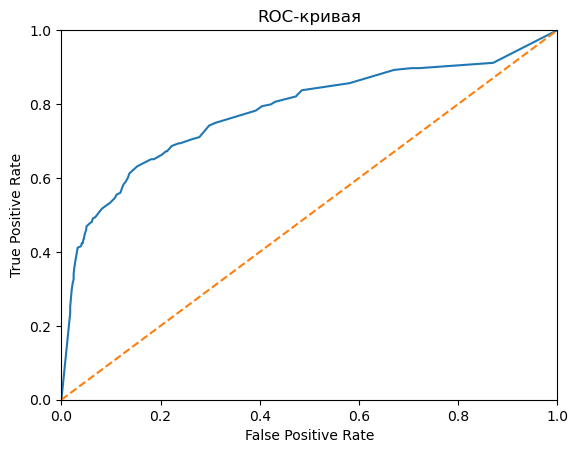

In [29]:
# Изображаем ROC-кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
По проекту нам важно измерять в моделях F1 и ROC_AUC (последнее измеряем по вероятностям классов).
</div>




<div class="alert alert-block alert-info">

V1: Добавлены матрицу ошибок, полноту, точность и ROC кривую. А также убрана тестовая выборка
    
</div>

In [30]:
# А теперь применим методом случайного леса
best_model = None
best_result = 0
for est in range(1, 11):
    # Обучим модель с заданным количеством деревьев
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    
    # Обучим модель на тренировочной выборке
    model.fit(features_train, target_train) 
    
    # Посчитаем качество модели на валидационной выборке
    result = model.score(features_valid, target_valid) 
    
    if result > best_result:
        # Сохраним наилучшую модель
        best_model = model
        # Сохраним наилучшее значение метрики accuracy на валидационных данных
        best_result = result
print("Accuracy наилучшей модели на валидационной выборке:", best_result)

Accuracy наилучшей модели на валидационной выборке: 0.85


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Важно сразу подбирать лучшие гиперпараметры по F1-мере. Здесь же подбираем по accuracy. Не факт, что оптимизация одного параметра будет означать оптимизации остальных. А в случае с нашим дисбалансом - тем более.

</div>


In [31]:
# Узнаем матрицу ошибок, чтобы выявлять полноту, точность и F1
confusion_matrix(target_valid,predicted_valid)

array([[1490,   92],
       [ 218,  200]], dtype=int64)

In [32]:
# Выявляем полноту, т.е. долю TP-ответов среди всех, у которых истинная метка 1. 
# Хорошо, когда значение recall близко к единице: модель хорошо ищет положительные объекты. 
# Если ближе к нулю — модель надо перепроверить и починить.

recall_score(target_valid, predicted_valid)

0.4784688995215311

In [33]:
# Выявляем точность, т.е. как много отрицательных ответов нашла модель, пока искала положительные. 
# Чем больше отрицательных, тем ниже точность.
precision_score(target_valid, predicted_valid)

0.684931506849315

In [34]:
# Выявляем F1-меру, т.е. соотношение полноты и точности
f1_score(target_valid, predicted_valid)

0.5633802816901409

Здесь получилось таким же, ничего не поменялось

<div class="alert alert-block alert-info">

V1: Добавлены матрицу ошибок, полноту, точность и ROC кривую. А также убрана тестовая выборка
    
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Мы не имеем права трогать тестовую выборку до тестирования. На тестировании уже смотрим ранее подобранную лучшую модель. Иначе мы будем в той или иной мере подбирать лучшие параметры на тестовой выборке, а о том, как модель будет работать с реальными данными судить не сможем.

</div>


In [35]:
# Проверим модель на адекватность

# Устанавливаем стратегию прогноза как "самый частый случай", 
# т.е. частую метку класса в наблюдаемом аргументе target, 
# переданном для соответствия
dummy_model = DummyClassifier(strategy = 'constant', constant=1)

# Обучим модель
dummy_model.fit(features_train, target_train)

# Создаем модель, указав стратению как "самый частый случай"
DummyClassifier(strategy = 'most_frequent')

# Получим предсказания модели
dummy_model.predict(features_train)

# Посчитаем качество модели
dummy_model.score(features_train, target_train)

0.19933333333333333

In [36]:
f1_score(dummy_model.predict(features_test), target_test)

0.3491539413949649

Здесь как-то не очень вышло, совсем низкий показатель

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь в дамми-модели я бы предсказал везде «1». Условно говоря, если предсказываем ноль, моделируем ситуацию, когда акцию с бонусами для удержания клиентов решили не проводить. Если предсказываем единицу − решили раздать бонусы вообще всем клиентам. Если в дамми-модели предсказываем по единице, можно подсчитать F1, она не будет зануляться.
    
`dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_score(dummy_model.predict(features_test), target_test)`
       
</div>



<div class="alert alert-block alert-info">

V1: Обновил
    
</div>

Здесь вышло, что оба методы обучения F1-меры показались себя одинаковыми

 <div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Выводы необходимо будет перепроверить и синхронизировать с решениями по коду.
       
</div>

<div class="alert alert-block alert-info">

V1: Изменены фрагменты кода и вывод
   
    
</div>

## Борьба с дисбалансом

In [37]:
confusion_matrix(target_valid,predicted_valid)

array([[1490,   92],
       [ 218,  200]], dtype=int64)

Здесь получается, что 
- TN; FP
- FN; TP


TN - истинно отрицательные ответы (1443)

FP - ложноотрицательные ответы (139)

FN - ложноположительные ответы (220)

TP - истинно положительные ответы (198)

Здесь значения TN намного превысили остальных

In [38]:
# Выявляем полноту, т.е. долю TP-ответов среди всех, у которых истинная метка 1. 
# Хорошо, когда значение recall близко к единице: модель хорошо ищет положительные объекты. 
# Если ближе к нулю — модель надо перепроверить и починить.

recall_score(target_valid, predicted_valid)

0.4784688995215311

Здесь приблизилась к золотой середине, ни плохо, ни слишком идеально

In [39]:
# Выявляем точность, т.е. как много отрицательных ответов нашла модель, пока искала положительные. 
# Чем больше отрицательных, тем ниже точность.
precision_score(target_valid, predicted_valid)

0.684931506849315

Здесь точность нам удовлетворит

In [40]:
# Выявляем F1-меру, т.е. соотношение полноты и точности
f1_score(target_valid, predicted_valid)

0.5633802816901409

Здесь получилось меньше по заявленному требованию - 0.59

In [41]:
# Создадим функуцию для контроля выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично, что используешь рукописную функцию, но здесь можно все оптимизировать, используя <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html">SMOTE</a> для увеличения выборки и <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html">RandomUnderSampler</a>  для уменьшения. 
    
Апсемплинг делается очень просто:
    
`oversample = SMOTE(random_state=RANDOM_STATE)`

`features_train_up, target_train_up = oversample.fit_resample(features_train_enc, target_train)`
    
*предварительно импотрировав `from imblearn.over_sampling import SMOTE`

**Чтобы импортировать imblearn его сначала требуется проинсталлировать. через `!pip install imblearn`
    
</div>



<div class="alert alert-block alert-info">

V1: Ок, учту в следующий раз)
   
    
</div>

In [42]:
# Вызываем функцию
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь ты дублируешь редкий класс в 10 раз. У нас же, как мы увидели раньше, дисбаланс составляет 1:4. То есть, теперь окажется, что бывший редкий класс будет в 2,5 раза чаще встречаться.
    
Правильно будет довести баланс классов до 1:1, то есть, умножить на 4 (подав такой коэффициент в функцию).

</div> 


In [43]:
# Попробуем увеличить F1-меру методом "Решающего дерева", меняя гиперпараметры
best_model = None
best_result = 0

for depth in range(1, 10):
    # Обучим модель с заданной глубиной дерева
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    
    # Обучим модель
    model.fit(features_upsampled, target_upsampled)
    
    # Получим предсказания модели
    predicted_valid = model.predict(features_valid)
    
    # Посчитаем качество модели
    result = accuracy_score(target_valid, predicted_valid) 
    
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
    
    print("max_depth =", depth, ": ", end='')
    print(result)
    
print()
print("Accuracy наилучшей модели на валидационной выборке:", best_result)

max_depth = 1 : 0.7545
max_depth = 2 : 0.765
max_depth = 3 : 0.765
max_depth = 4 : 0.711
max_depth = 5 : 0.8105
max_depth = 6 : 0.7665
max_depth = 7 : 0.774
max_depth = 8 : 0.764
max_depth = 9 : 0.768

Accuracy наилучшей модели на валидационной выборке: 0.8105


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
При изменении вводных условий гиперпараметры моделям необходимо подбирать заново.

</div>

In [44]:
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5405940594059405


Результат тот же

<div class="alert alert-block alert-info">

V1: Я перебирал все значения выборки, f1 не изменился
    
</div>

In [45]:
# А теперь применим методом случайного леса
best_model = None
best_result = 0
for est in range(1, 21):
    # Обучим модель с заданным количеством деревьев
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    
    # Обучим модель на тренировочной выборке
    model.fit(features_upsampled, target_upsampled)
    
    # Посчитаем качество модели на валидационной выборке
    result = model.score(features_valid, target_valid) 
    
    if result > best_result:
        # Сохраним наилучшую модель
        best_model = model
        # Сохраним наилучшее значение метрики accuracy на валидационных данных
        best_result = result
        
    print("max_depth =", depth, ": ", end='')
    print(result)

print()
print("Accuracy наилучшей модели на валидационной выборке:", best_result)

max_depth = 9 : 0.7615
max_depth = 9 : 0.8115
max_depth = 9 : 0.8035
max_depth = 9 : 0.825
max_depth = 9 : 0.8195
max_depth = 9 : 0.8355
max_depth = 9 : 0.828
max_depth = 9 : 0.843
max_depth = 9 : 0.8355
max_depth = 9 : 0.846
max_depth = 9 : 0.8385
max_depth = 9 : 0.845
max_depth = 9 : 0.8395
max_depth = 9 : 0.8455
max_depth = 9 : 0.8415
max_depth = 9 : 0.8465
max_depth = 9 : 0.844
max_depth = 9 : 0.849
max_depth = 9 : 0.8455
max_depth = 9 : 0.85

Accuracy наилучшей модели на валидационной выборке: 0.85


In [46]:
# Получаем предсказания
predicted_valid = model.predict(features_valid)

In [47]:
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5978552278820375


Наконец-то добились ожидаемого результата!

In [48]:
# Создадим функцию, которая будет уменьшать выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [49]:
# Вызываем функцию
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.4)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь также нужно делать даунсемплинг в 4 раза, а не в 10

</div>

In [50]:
# Попробуем увеличить F1-меру методом "Решающего дерева", меняя гиперпараметры
best_model = None
best_result = 0

for depth in range(1, 10):
    # Обучим модель с заданной глубиной дерева
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    
    # Обучим модель
    model.fit(features_downsampled, target_downsampled)
    
    # Получим предсказания модели
    predicted_valid = model.predict(features_valid)
    
    # Посчитаем качество модели
    result = accuracy_score(target_valid, predicted_valid) 
    
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
    
    print("max_depth =", depth, ": ", end='')
    print(result)
    
print()
print("Accuracy наилучшей модели на валидационной выборке:", best_result)

max_depth = 1 : 0.7545
max_depth = 2 : 0.824
max_depth = 3 : 0.83
max_depth = 4 : 0.8225
max_depth = 5 : 0.7925
max_depth = 6 : 0.788
max_depth = 7 : 0.8045
max_depth = 8 : 0.777
max_depth = 9 : 0.7805

Accuracy наилучшей модели на валидационной выборке: 0.83


In [51]:
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5254054054054054


Результат тот же, как у этого метода - случайного леса с увеличением выборком

In [52]:
# А теперь применим методом случайного леса
best_model = None
best_result = 0
for est in range(1, 11):
    # Обучим модель с заданным количеством деревьев
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    
    # Обучим модель на тренировочной выборке
    model.fit(features_downsampled, target_downsampled)
    
    # Посчитаем качество модели на валидационной выборке
    result = model.score(features_valid, target_valid) 
    
    if result > best_result:
        # Сохраним наилучшую модель
        best_model = model
        # Сохраним наилучшее значение метрики accuracy на валидационных данных
        best_result = result

# Получаем предсказания
predicted_valid = model.predict(features_valid)

In [53]:
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.574635241301908


Немножко снизился, на 2% заявленного требования

In [54]:
# Проверим на порог
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.5f}".format(threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.238, Полнота = 0.945, F1 = 0.38017
Порог = 0.02 | Точность = 0.238, Полнота = 0.945, F1 = 0.38017
Порог = 0.04 | Точность = 0.238, Полнота = 0.945, F1 = 0.38017
Порог = 0.06 | Точность = 0.238, Полнота = 0.945, F1 = 0.38017
Порог = 0.08 | Точность = 0.238, Полнота = 0.945, F1 = 0.38017
Порог = 0.10 | Точность = 0.287, Полнота = 0.902, F1 = 0.43508
Порог = 0.12 | Точность = 0.287, Полнота = 0.902, F1 = 0.43508
Порог = 0.14 | Точность = 0.287, Полнота = 0.902, F1 = 0.43508
Порог = 0.16 | Точность = 0.287, Полнота = 0.902, F1 = 0.43508
Порог = 0.18 | Точность = 0.287, Полнота = 0.902, F1 = 0.43508
Порог = 0.20 | Точность = 0.350, Полнота = 0.856, F1 = 0.49653
Порог = 0.22 | Точность = 0.350, Полнота = 0.856, F1 = 0.49653
Порог = 0.24 | Точность = 0.350, Полнота = 0.856, F1 = 0.49653
Порог = 0.26 | Точность = 0.350, Полнота = 0.856, F1 = 0.49653
Порог = 0.28 | Точность = 0.350, Полнота = 0.856, F1 = 0.49653


<div class="alert alert-block alert-info">

~Изменяя значение порога, F1 не так уж сильно меняется, есть у меня недотчеты? Если против, то после того как у меня получится превысить значения 0.58 проведу тестирование (в 4 пункте)?~
    
</div>

Здесь F1 больше 0.59 можно добиться методом: Случайного леса с увеличением выборки или Решающего дерева с понижением выборки. Значит по этому методу будем тестировать модели

 
<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Да, кое-что есть. Хорошие новости в том, что 0.59 в этом проекте, исправив недочеты, подобрав гиперпараметры и выбрав перспективную модель, достичь несложно.
       
</div>


In [55]:
# Попробуем увеличить F1-меру методом "Решающего дерева", меняя гиперпараметры
best_model = None
best_result = 0

for depth in range(1, 10):
    # Обучим модель с заданной глубиной дерева
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    
    # Обучим модель
    model.fit(features_downsampled, target_downsampled)
    
    # Получим предсказания модели
    predicted_valid = model.predict(features_valid)

In [56]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

In [57]:
auc_roc

0.7696899630411507

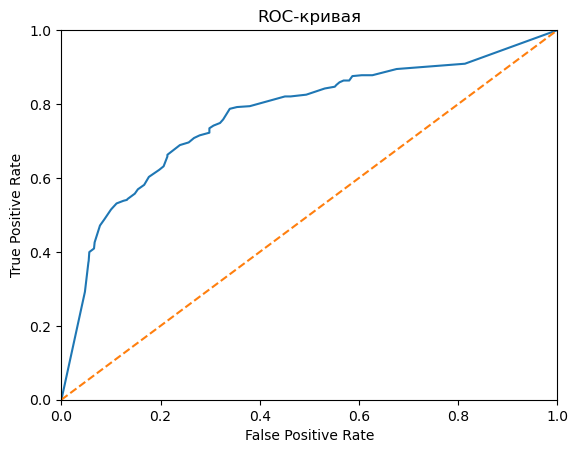

In [58]:
# Изображаем ROC-кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

In [59]:
# А теперь применим методом случайного леса
best_model = None
best_result = 0
for est in range(1, 21):
    # Обучим модель с заданным количеством деревьев
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    
    # Обучим модель на тренировочной выборке
    model.fit(features_upsampled, target_upsampled)

# Получаем предсказания
predicted_valid = model.predict(features_valid)

In [60]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

In [61]:
auc_roc

0.8241982167808902

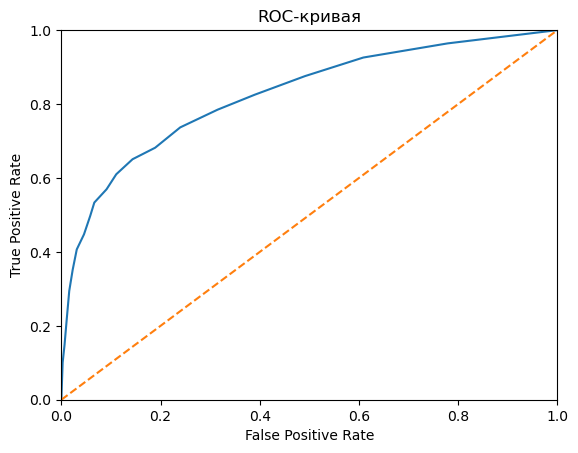

In [62]:
# Изображаем ROC-кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

Здесь намного получше, чем методм "Решающее дерево" с уменьшением выборки

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь нужно оставить промежуточный комментарий с качеством и гиперпараметрами лучшей модели − той, которую возьмем на тестирование. Если это не модель с лучшим значением F1, то можно пояснить, почему выбрали ее (например, скорость обучения высокая).
    
После тестирования необходимо будет сделать общий вывод по проекту: описать лучшую модель, ее результаты на тестовой выборке, сравнить модель с константной, прокомментировать, как модель решает задачу бизнеса: здесь можно подсчитать recall и объяснить, какую долю клиентов на отток мы детектируем верно.


</div>

<div class="alert alert-block alert-info">

V1: Исправлен, добавлены вывод, изменение гиперпараметры и тестирование модели
    
</div>

## Тестирование модели

In [63]:
# Протестируем модели "Решающего дерева" с уменьшением выборки
best_model = None
best_result = 0

for depth in range(1, 10):
    # Обучим модель с заданной глубиной дерева
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    
    # Обучим модель
    model.fit(features_downsampled, target_downsampled)
    
    # Получим предсказания модели
    predicted_valid = model.predict(features_valid)

In [64]:
# Получим предсказания обучающей модели
train_predictions = model.predict(features_train)

# Получим предсказания тестовой модели
test_predictions = model.predict(features_test)

In [65]:
print("Accuracy")
print("Обучающая выборка:", accuracy_score(target_train, train_predictions))
print("Тестовая выборка:", accuracy_score(target_test, test_predictions))

Accuracy
Обучающая выборка: 0.8511666666666666
Тестовая выборка: 0.7775


In [66]:
# Выявляем полноту, т.е. долю TP-ответов среди всех, у которых истинная метка 1. 
# Хорошо, когда значение recall близко к единице: модель хорошо ищет положительные объекты. 
# Если ближе к нулю — модель надо перепроверить и починить.

recall_score(target_test, test_predictions)

0.5886524822695035

Здесь приблизилась к золотой середине, ни плохо, ни слишком идеально

In [67]:
# Выявляем точность, т.е. как много отрицательных ответов нашла модель, пока искала положительные. 
# Чем больше отрицательных, тем ниже точность.
precision_score(target_test, test_predictions)

0.47884615384615387

Здесь тоже вполне устраивает

In [68]:
# Выявляем F1-меру, т.е. соотношение полноты и точности
f1_score(target_valid, predicted_valid)

0.5254054054054054

Как раз больше 0.59

In [69]:
# А теперь протестируем модели случайного леса
best_model = None
best_result = 0
for est in range(1, 21):
    # Обучим модель с заданным количеством деревьев
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    
    # Обучим модель на тренировочной выборке
    model.fit(features_upsampled, target_upsampled)

# Получаем предсказания
predicted_valid = model.predict(features_valid)

In [70]:
# Получим предсказания обучающей модели
train_predictions = model.predict(features_train)

# Получим предсказания тестовой модели
test_predictions = model.predict(features_test)

In [71]:
print("Accuracy")
print("Обучающая выборка:", accuracy_score(target_train, train_predictions))
print("Тестовая выборка:", accuracy_score(target_test, test_predictions))

Accuracy
Обучающая выборка: 0.9996666666666667
Тестовая выборка: 0.843


Здесь модель явно переобучена, да уж плохо. Но тестовая выборка показалась неплохим результатом

In [72]:
# Выявляем полноту, т.е. долю TP-ответов среди всех, у которых истинная метка 1. 
# Хорошо, когда значение recall близко к единице: модель хорошо ищет положительные объекты. 
# Если ближе к нулю — модель надо перепроверить и починить.

recall_score(target_test, test_predictions)

0.5342789598108747

Здесь тоже самое - приблизилась к золотой середине, ни плохо, ни слишком идеально. Но по сравнению предыдующей модели здесь полнота меньше получилась

In [73]:
# Выявляем точность, т.е. как много отрицательных ответов нашла модель, пока искала положительные. 
# Чем больше отрицательных, тем ниже точность.
precision_score(target_test, test_predictions)

0.6588921282798834

Здесь точность стала более выше предыдующей

In [74]:
# Выявляем F1-меру, т.е. соотношение полноты и точности
f1_score(target_valid, predicted_valid)

0.5978552278820375

Как раз больше 0.59

In [75]:
# Создадим константную модель
target_pred_constant = pd.Series(0, index=target_test.index)

In [76]:
print("Accuracy")
print("Константная выборка:", accuracy_score(target_test, target_pred_constant))

Accuracy
Константная выборка: 0.7885


In [77]:
# Выявляем F1-меру, т.е. соотношение полноты и точности
f1_score(target_test, target_pred_constant)

0.0

Здесь константная модель получилось 0

Вывод

Самая оптимальная модель оказалась метод "Случайного леса", скорость обучения дает о себе знать, но показатели качества намного уступает "Решающего дерева".

Чтобы справиться с дисбалансом, мы увеличили и уменьшали (upsampling и downsampling) значение в 4 раза.

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Есть несколько важных моментов, которые необходимо улучшить. Их ты найдешь в разноцветных комментариях.
    
**Отмечу положительные моменты проекта🚀**
    
* Хороший выбор моделей, порядок исследования.
* Есть пояснения к шагам, код с высокой читаемостью. 

    
**На что стоит обратить внимание🤔**
    
* Необходимо удалить лишние колонки до энкодинга.
* Гиперпараметры моделеям подбираем в каждом случае применения методики борьбы с дисбалансом и в исследовании моделей без учета дисбаланса. Подбираем по F1.
* Апсемпилнг нужно довести до баланса классов (1:1, умножаем редкий класс на 4).
* Необходимо везде оставлять промежуточные выводы и дополнить итоговый вывод.
* Необходимо достичь качества модели F1>0.59
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*